In [124]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [125]:
indo = pd.read_csv('indonesia.csv')

In [126]:
indo

,Category,Annual Mean,5-yr smooth,CO2 Emission
0,1901,25.59,25.60,NaN
1,1902,25.56,25.58,NaN
2,1903,25.57,25.56,NaN
3,1904,25.55,25.54,NaN
4,1905,25.60,25.54,NaN
...,...,...,...,...
115,2016,26.42,26.31,1.892441
116,2017,26.22,26.32,2.013671
117,2018,26.23,26.33,2.178462
118,2019,26.39,26.34,NaN


In [127]:
indo.rename(columns={'Category':'Year'}, inplace=True)
indo

,Year,Annual Mean,5-yr smooth,CO2 Emission
0,1901,25.59,25.60,NaN
1,1902,25.56,25.58,NaN
2,1903,25.57,25.56,NaN
3,1904,25.55,25.54,NaN
4,1905,25.60,25.54,NaN
...,...,...,...,...
115,2016,26.42,26.31,1.892441
116,2017,26.22,26.32,2.013671
117,2018,26.23,26.33,2.178462
118,2019,26.39,26.34,NaN


In [128]:
indo[0:10]

,Year,Annual Mean,5-yr smooth,CO2 Emission
0,1901,25.59,25.60,NaN
1,1902,25.56,25.58,NaN
2,1903,25.57,25.56,NaN
3,1904,25.55,25.54,NaN
4,1905,25.60,25.54,NaN
5,1906,25.60,25.55,NaN
6,1907,25.53,25.57,NaN
7,1908,25.59,25.60,NaN
8,1909,25.58,25.64,NaN
9,1910,25.57,25.68,NaN


(array([ 8., 28., 23., 20.,  6., 13.,  8.,  4.,  6.,  4.]),
 array([25.45 , 25.547, 25.644, 25.741, 25.838, 25.935, 26.032, 26.129,
        26.226, 26.323, 26.42 ]),
 <a list of 10 Patch objects>)

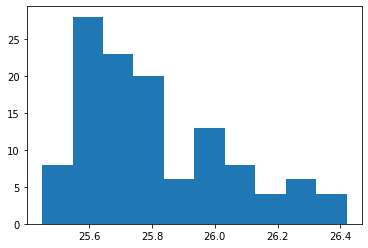

In [129]:
am = indo["Annual Mean"]
plt.hist(am)

In [130]:
year = indo["Year"]
am = indo["Annual Mean"]
smooth = indo["5-yr smooth"]
emission = indo ["CO2 Emission"]

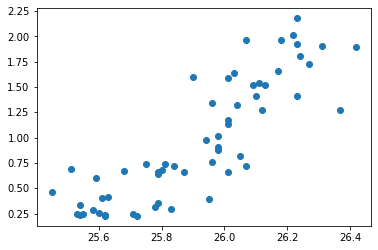

In [131]:
plt.scatter(am, emission)

In [132]:
indo.tail(5)

,Year,Annual Mean,5-yr smooth,CO2 Emission
115,2016,26.42,26.31,1.892441
116,2017,26.22,26.32,2.013671
117,2018,26.23,26.33,2.178462
118,2019,26.39,26.34,NaN
119,2020,26.38,26.34,NaN


In [133]:
print(indo.dtypes)

Year              int64
Annual Mean     float64
5-yr smooth     float64
CO2 Emission    float64
dtype: object


In [134]:
indo.count

<bound method DataFrame.count of      Year  Annual Mean  5-yr smooth  CO2 Emission
0    1901        25.59        25.60           NaN
1    1902        25.56        25.58           NaN
2    1903        25.57        25.56           NaN
3    1904        25.55        25.54           NaN
4    1905        25.60        25.54           NaN
..    ...          ...          ...           ...
115  2016        26.42        26.31      1.892441
116  2017        26.22        26.32      2.013671
117  2018        26.23        26.33      2.178462
118  2019        26.39        26.34           NaN
119  2020        26.38        26.34           NaN

[120 rows x 4 columns]>

In [135]:
indo["Annual Mean"].tail(5)

115    26.42
116    26.22
117    26.23
118    26.39
119    26.38
Name: Annual Mean, dtype: float64

In [136]:
indo.corr()

,Year,Annual Mean,5-yr smooth,CO2 Emission
Year,1.000000,0.740380,0.815462,0.981846
Annual Mean,0.740380,1.000000,0.909506,0.853085
5-yr smooth,0.815462,0.909506,1.000000,0.958118
CO2 Emission,0.981846,0.853085,0.958118,1.000000


In [137]:
indo[["Annual Mean", "CO2 Emission"]].corr()

,Annual Mean,CO2 Emission
Annual Mean,1.000000,0.853085
CO2 Emission,0.853085,1.000000


In [138]:
indo.describe

<bound method NDFrame.describe of      Year  Annual Mean  5-yr smooth  CO2 Emission
0    1901        25.59        25.60           NaN
1    1902        25.56        25.58           NaN
2    1903        25.57        25.56           NaN
3    1904        25.55        25.54           NaN
4    1905        25.60        25.54           NaN
..    ...          ...          ...           ...
115  2016        26.42        26.31      1.892441
116  2017        26.22        26.32      2.013671
117  2018        26.23        26.33      2.178462
118  2019        26.39        26.34           NaN
119  2020        26.38        26.34           NaN

[120 rows x 4 columns]>

In [139]:
indo.describe(include="all")

,Year,Annual Mean,5-yr smooth,CO2 Emission
count,120.000000,120.000000,120.000000,59.000000
mean,1960.500000,25.809417,25.809417,0.973702
std,34.785054,0.231267,0.210347,0.596164
min,1901.000000,25.450000,25.540000,0.227084
25%,1930.750000,25.627500,25.677500,0.407617
50%,1960.500000,25.750000,25.720000,0.755317
75%,1990.250000,25.980000,25.952500,1.522106
max,2020.000000,26.420000,26.340000,2.178462


In [140]:
indo["Annual Mean"].mean()

25.809416666666678

In [141]:
indo["Annual Mean"].value_counts()

25.75    8
26.01    5
25.74    5
25.62    4
25.60    4
        ..
26.12    1
25.76    1
25.45    1
25.86    1
26.24    1
Name: Annual Mean, Length: 61, dtype: int64

In [142]:
indo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          120 non-null    int64  
 1   Annual Mean   120 non-null    float64
 2   5-yr smooth   120 non-null    float64
 3   CO2 Emission  59 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 3.9 KB


Cek Missing Value

In [143]:
indo.isnull()

,Year,Annual Mean,5-yr smooth,CO2 Emission
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
...,...,...,...,...
115,False,False,False,False
116,False,False,False,False
117,False,False,False,False
118,False,False,False,True


In [144]:
indo.isnull().sum()

Year             0
Annual Mean      0
5-yr smooth      0
CO2 Emission    61
dtype: int64

In [145]:
indo.dropna(inplace=True)

In [146]:
indo.shape

(59, 4)

Visualisasi Awal

Text(0.5, 1.0, 'General Statistics of Indonesia Dataset')

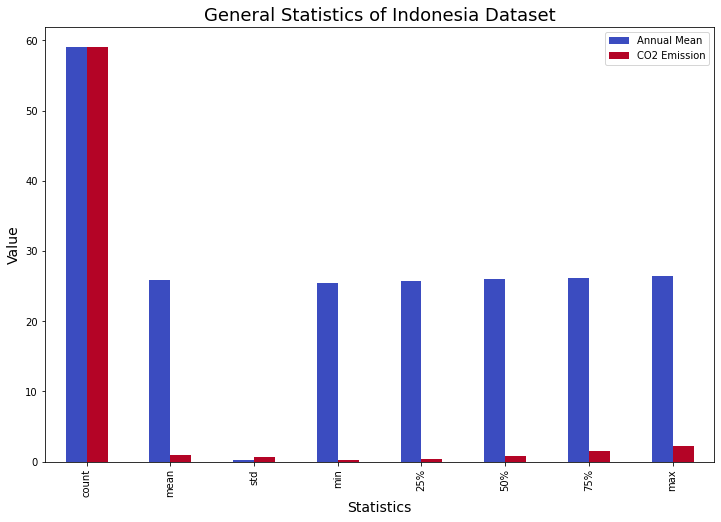

In [147]:
indo[["Annual Mean", "CO2 Emission"]].describe().plot(kind = 'bar', figsize = (12,8), colormap='coolwarm')
plt.xlabel('Statistics',fontsize=14)
plt.ylabel('Value',fontsize=14)
plt.title("General Statistics of Indonesia Dataset",fontsize=18)

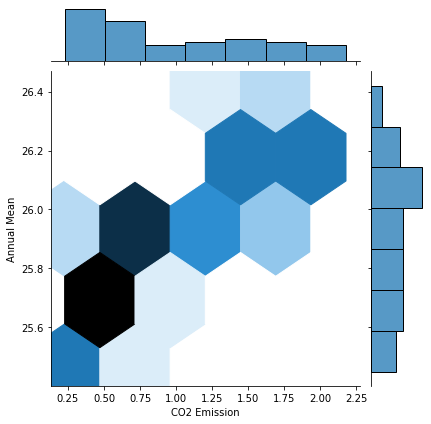

In [148]:
sns.jointplot(x='CO2 Emission',y='Annual Mean',kind='hex', data=indo)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


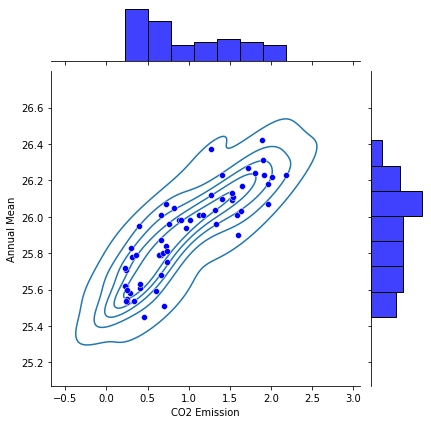

In [149]:
sns.jointplot("CO2 Emission", "Annual Mean",data=indo, color="b").plot_joint(sns.kdeplot, zorder=0, n_levels=6)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

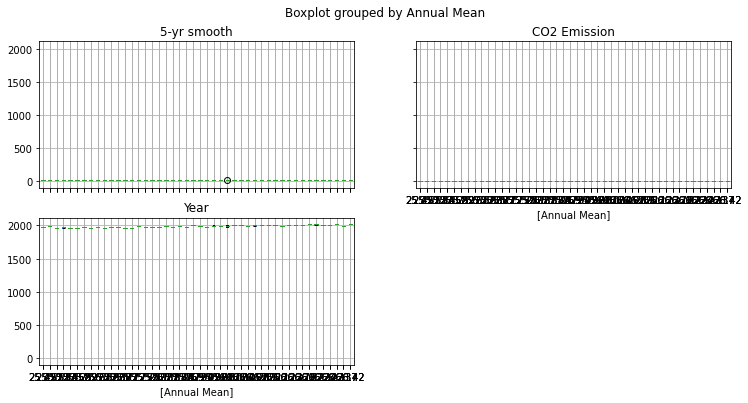

In [150]:
indo.boxplot(by="Annual Mean", figsize=(12, 6))
pass

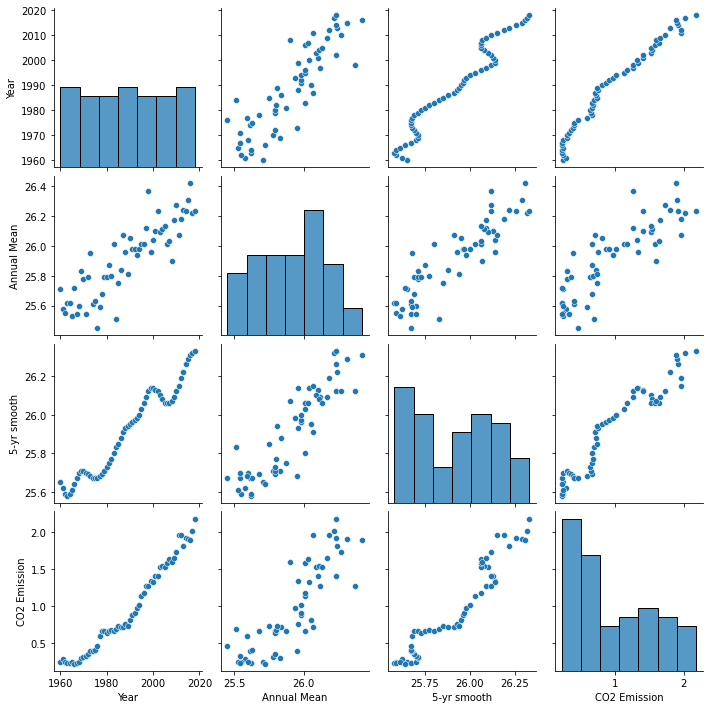

In [151]:
sns.pairplot(data=indo,kind='scatter')

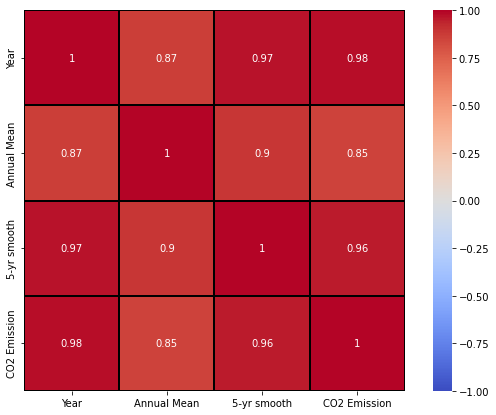

In [152]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(indo.corr(),annot=True,cmap='coolwarm',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

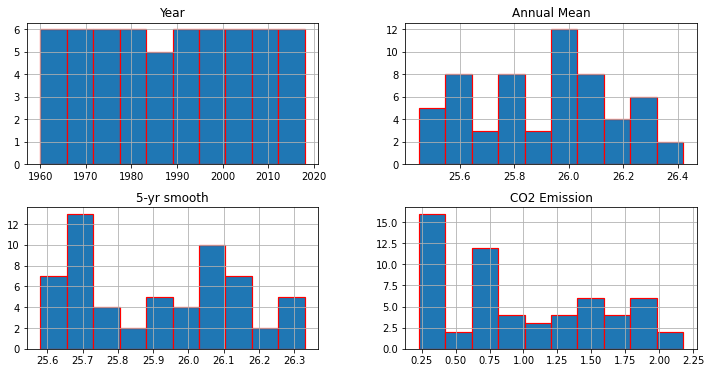

In [153]:
indo.hist(edgecolor='red', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)

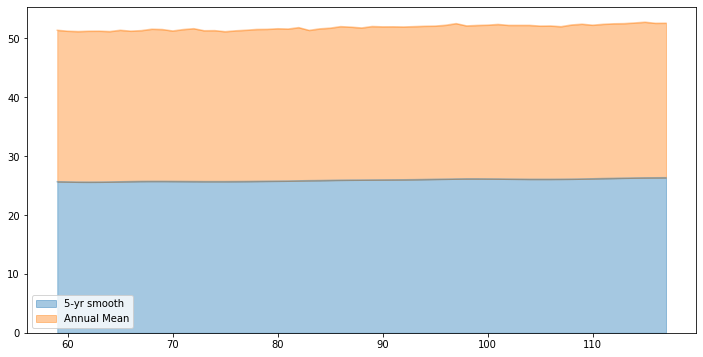

In [154]:
indo.plot.area(y=['5-yr smooth','Annual Mean'],alpha=0.4,figsize=(12, 6));

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


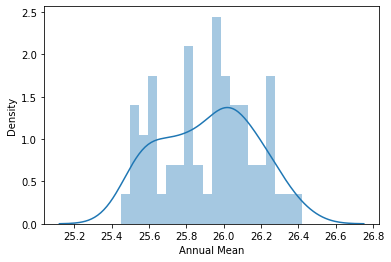

In [155]:
sns.distplot(indo['Annual Mean'],kde=True,bins=20);

Cek Outlier

In [156]:
#select year 2014-2018
indo_year = indo

In [157]:
#melihat outlier
def detect_outliers(df, x):
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3-Q1
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]

In [158]:
#cek outlier kolom CO2 Emission
detect_outliers(indo_year,'CO2 Emission')

,Year,Annual Mean,5-yr smooth,CO2 Emission


In [159]:
#cek outlier kolom Annual Mean
detect_outliers(indo_year,'Annual Mean')

,Year,Annual Mean,5-yr smooth,CO2 Emission


In [160]:
#hapus data outlier dari kolom Annual Mean
indo_year = indo_year.replace((indo_year[indo_year['Annual Mean']>26.4]).values, indo_year['Annual Mean'].mean())

In [161]:
#cek outlier kolom Annual Mean
detect_outliers(indo_year,'Annual Mean')

,Year,Annual Mean,5-yr smooth,CO2 Emission


In [162]:
X = indo_year.iloc[:,2]
y = indo_year.iloc[:,3]

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
X_valid, X_test, y_valid, y_test = train_test_split(X_train,y_train, test_size=0.5)

In [164]:
print("X train shape: ", X_train.shape)
print("X test shape: ", X_test.shape)
print("X valid shape: ", X_valid.shape)

X train shape:  (41,)
X test shape:  (21,)
X valid shape:  (20,)


In [165]:
regressor = LinearRegression()
regressor.fit(X_train.values.reshape(-1, 1), y_train)
y_pred = regressor.predict(X_test.values.reshape(-1, 1))

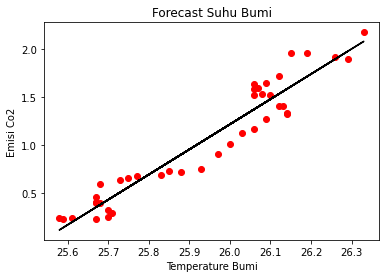

In [166]:
plt.scatter(X_train.values.reshape(-1, 1), y_train, color='red')
plt.plot(X_train.values.reshape(-1, 1), regressor.predict(X_train.values.reshape(-1, 1)), color='black')
plt.title('Forecast Suhu Bumi')
plt.xlabel('Temperature Bumi')
plt.ylabel('Emisi Co2')
plt.show()

In [167]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_pred , y_test) )

Mean absolute error: 0.16
Residual sum of squares (MSE): 0.03
R2-score: 0.89


In [168]:
#model1 menggunakan Multilayer Neural Network

from keras.models import Sequential
from keras.layers import Flatten, Dense

model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(64,activation='relu'))
model1.add(Dense(1,activation='softmax'))

In [169]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history1 = model1.fit(X_train,y_train,epochs=100,batch_size=100,validation_data=(X_valid,y_valid))

Epoch 1/100
1/1 [==============================] - 1s 571ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 32ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00 - val_acc: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - acc: 0.0000e+00 - val_loss: 0.0000e+00